In [1]:
import sklearn

In [2]:
import statsmodels

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tempt = pd.read_csv('/content/drive/MyDrive/AIML_PRACTICE/time series/daily-minimum-temperatures-in-me.csv')

In [7]:
tempt

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [8]:
tempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [9]:
tempt['Date'] = pd.to_datetime(tempt['Date'])

In [10]:
tempt['Date']

,Date
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
3645,1990-12-27
3646,1990-12-28
3647,1990-12-29
3648,1990-12-30


In [11]:
tempt[tempt['Daily minimum temperatures']=='?0.2']

,Date,Daily minimum temperatures
565,1982-07-20,?0.2


In [13]:
tempt['Daily minimum temperatures'] = tempt['Daily minimum temperatures'].replace('?0.2', np.nan)

tempt = tempt.dropna(subset=['Daily minimum temperatures'])

In [16]:
tempt[tempt['Daily minimum temperatures']=='?0.8']

,Date,Daily minimum temperatures
566,1982-07-21,?0.8


In [18]:
tempt['Daily minimum temperatures'] = tempt['Daily minimum temperatures'].replace('?0.8', np.nan)

tempt = tempt.dropna(subset=['Daily minimum temperatures'])

In [20]:
tempt['Daily minimum temperatures'] = (
    tempt['Daily minimum temperatures']
    .astype(str)
    .str.replace('?', '', regex=False)
    .str.strip()
)

tempt['Daily minimum temperatures'] = pd.to_numeric(
    tempt['Daily minimum temperatures'],
    errors='coerce'
)

tempt = tempt.dropna(subset=['Daily minimum temperatures'])


In [24]:
results = adfuller(tempt['Daily minimum temperatures'])
print(f'Statistics: {results[0]}')
print(f'p-value: {results[1]}')

Statistics: -4.455599541208821
p-value: 0.00023633928349746448


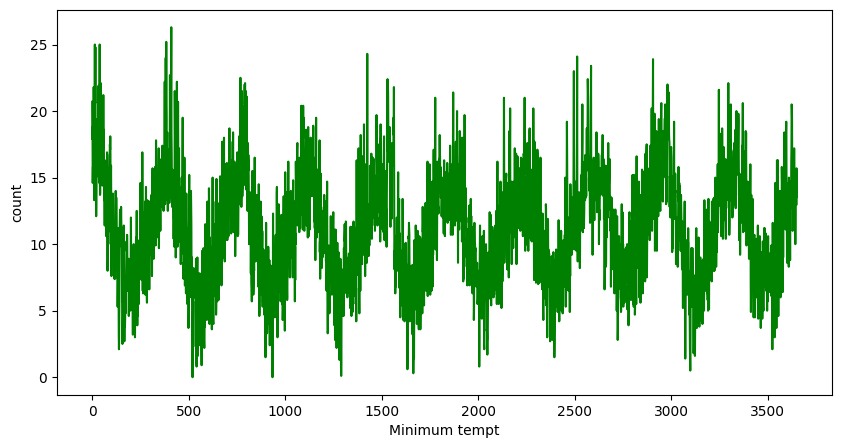

In [27]:
plt.figure(figsize=(10,5))
plt.plot(tempt['Daily minimum temperatures'],color='green')
plt.xlabel('Minimum tempt')
plt.ylabel('count')
plt.show()

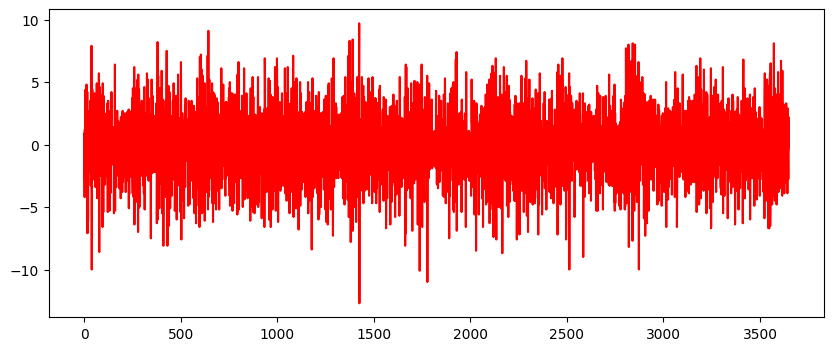

In [29]:
diff = tempt['Daily minimum temperatures'].diff()
diff.plot(figsize=(10,4),color='red')
plt.show()

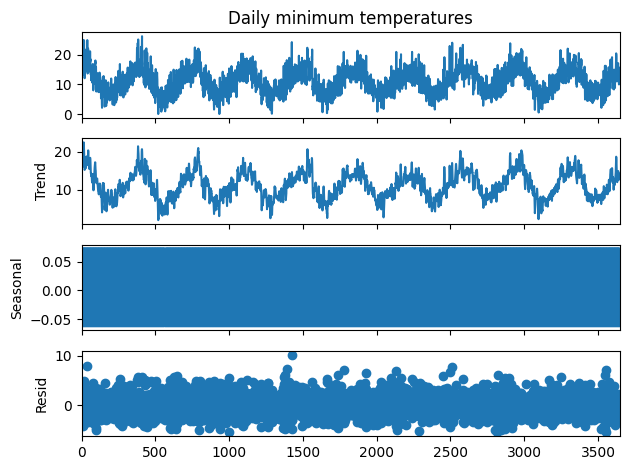

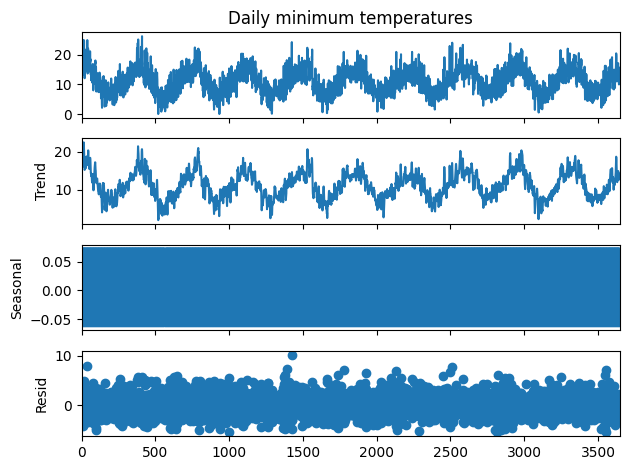

In [33]:
decomp = seasonal_decompose(tempt['Daily minimum temperatures'],model = 'additive',period=5)
decomp.plot()

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
rolling_mean = tempt['Daily minimum temperatures'].rolling(window=20).mean()

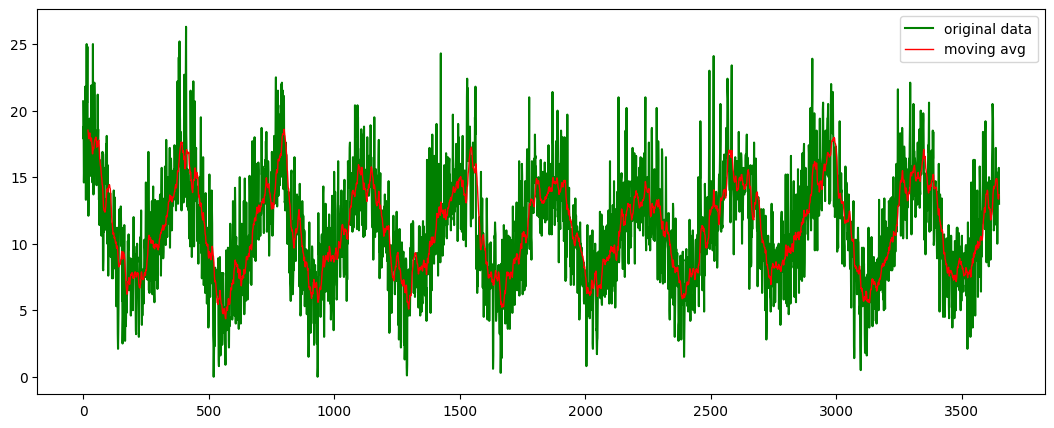

In [41]:
plt.figure(figsize=(13,5))
plt.plot(tempt['Daily minimum temperatures'],label = 'original data',color='green')
plt.plot(rolling_mean,label = 'moving avg',color='red',lw = 1)
plt.legend()
plt.show()

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 640x480 with 0 Axes>

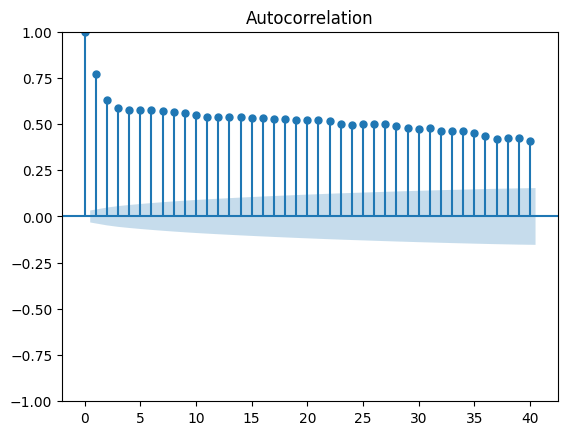

In [46]:
plt.figure()
plot_acf(tempt['Daily minimum temperatures'],lags = 40)
plt.show()

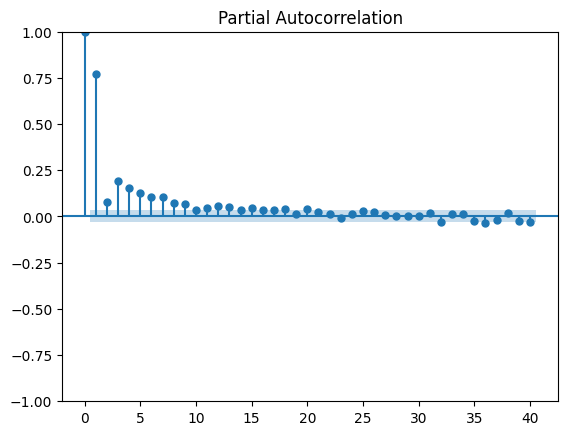

In [47]:
plot_pacf(tempt['Daily minimum temperatures'],lags=40)
plt.show()

In [51]:
tempt['Date'] = pd.to_datetime(tempt['Date'])
tempt.set_index('Date', inplace=True)
tempt = tempt.sort_index()

tempt = tempt.asfreq('D')
tempt['Daily minimum temperatures'].fillna(method='ffill', inplace=True)


KeyError: 'Date'

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(tempt['Daily minimum temperatures'], order=(2,0,1))
fit_model = model.fit()

print(fit_model.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                   SARIMAX Results                                    
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3652
Model:                         ARIMA(2, 0, 1)   Log Likelihood               -8412.792
Date:                        Sat, 31 Jan 2026   AIC                          16835.584
Time:                                06:36:08   BIC                          16866.599
Sample:                            01-01-1981   HQIC                         16846.629
                                 - 12-31-1990                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5026      0.820     14.020      0.000       9.895      13.111
ar.L1          1.4537      0.019     77.928      0.000       1.417 

In [53]:
start_date = "1991-01-01"
end_date   = "1991-01-15"

custom_dates = pd.date_range(start=start_date,
                             end=end_date,
                             freq='D')

steps = len(custom_dates)

forecast = fit_model.forecast(steps=steps)

forecast_df = pd.DataFrame({
    "Date": custom_dates,
    "Predicted_Temp": forecast.values
})

forecast_df.set_index("Date", inplace=True)

forecast_df


,Predicted_Temp
Date,
1991-01-01,13.297786
1991-01-02,13.427234
1991-01-03,13.479187
1991-01-04,13.495492
1991-01-05,13.495429
1991-01-06,13.487878
1991-01-07,13.476930
1991-01-08,13.464469
1991-01-09,13.451364


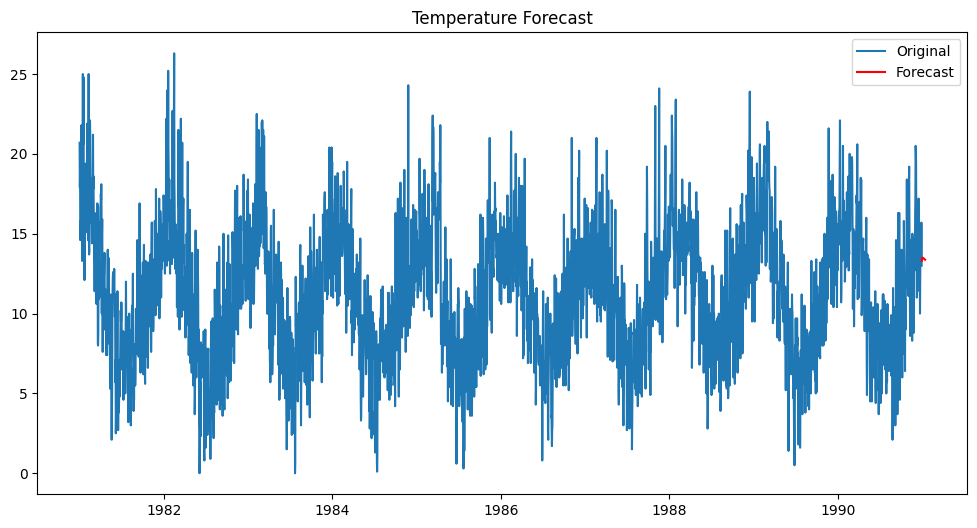

In [54]:
plt.figure(figsize=(12,6))

plt.plot(tempt['Daily minimum temperatures'], label='Original')
plt.plot(forecast_df, label='Forecast', color='red')

plt.legend()
plt.title("Temperature Forecast")
plt.show()
